<a href="https://colab.research.google.com/github/ArunadeviRamesh/Detection-of-COVID-Deep-Learning-99.3-Accuracy-/blob/master/Detection_of_COVID_19_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
train_dir = '/content/drive/My Drive/xray_dataset_covid19/train'
validation_dir ='/content/drive/My Drive/xray_dataset_covid19/test'
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEMONIA')


In [2]:
train_normal_fnames = os.listdir(train_normal_dir)
print(train_normal_fnames[:10])

train_pneumonia_fnames = os.listdir(train_pneumonia_dir)
train_pneumonia_fnames.sort()
print(train_pneumonia_fnames[:10])

['IM-0005-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0011-0001-0001.jpeg', 'IM-0073-0001.jpeg', 'IM-0046-0001.jpeg', 'IM-0015-0001.jpeg', 'IM-0016-0001.jpeg', 'IM-0087-0001.jpeg', 'IM-0041-0001.jpeg']
['1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', '1-s2.0-S1684118220300682-main.pdf-002-a2.png', '1-s2.0-S1684118220300682-main.pdf-003-b1.png', '1-s2.0-S1684118220300682-main.pdf-003-b2.png', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', '171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg', '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg']


In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

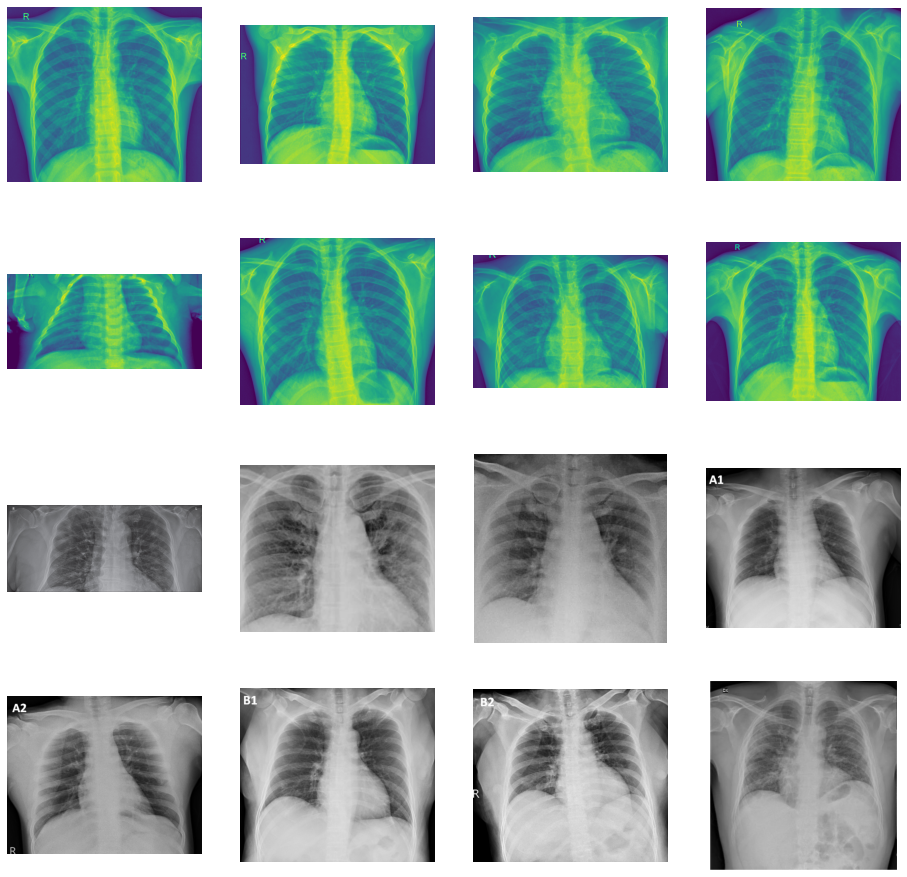

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [7]:


# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 146 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
history=model.fit(train_generator,epochs = 15,validation_data = validation_generator)

Epoch 1/15
8/8 [==============================] - 60s 8s/step - loss: 3.1775 - acc: 0.5548 - val_loss: 0.4707 - val_acc: 0.9250
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.7491 - acc: 0.6712 - val_loss: 0.3200 - val_acc: 0.9500
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.3279 - acc: 0.8562 - val_loss: 0.0798 - val_acc: 1.0000
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.1963 - acc: 0.9315 - val_loss: 0.1196 - val_acc: 1.0000
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.1975 - acc: 0.9247 - val_loss: 0.2284 - val_acc: 0.8750
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.1787 - acc: 0.9315 - val_loss: 0.0403 - val_acc: 1.0000
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.1700 - acc: 0.9315 - val_loss: 0.0533 - val_acc: 1.0000
Epoch 8/15
8/8 [==============================] - 8s 993ms/step - loss: 0.0699 - acc: 0.9726 - val_loss: 0.009

In [12]:

# Saving Model
model.save(filepath='/content/drive/My Drive/xray_dataset_covid19/covid_model.h5', overwrite=True)


In [13]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
img = load_image('/content/drive/My Drive/xray_dataset_covid19/prediction/C.jpeg')
# predict the class
result = model.predict(img)
if(result[0]==1):
  print("COVID")
else:
  print("NO COVID")


Using TensorFlow backend.


COVID


In [15]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.032207369804382324, 0.9931507110595703]

In [16]:
import os
train_generator.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

In [20]:
import pandas as pd
import numpy as np
from keras.preprocessing import image
y_actual, y_test = [],[]
for i in os.listdir("/content/drive/My Drive/xray_dataset_covid19/test/PNEUMONIA/"):
    img=image.load_img("/content/drive/My Drive/xray_dataset_covid19/test/PNEUMONIA/"+i,target_size=(150,150))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

for i in os.listdir("/content/drive/My Drive/xray_dataset_covid19/test/NORMAL/"):
    img=image.load_img("/content/drive/My Drive/xray_dataset_covid19/test/NORMAL/"+i,target_size=(150,150))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(0)